In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook 

# self-written helper functions
import fourier_funcs as ff
import drawing_funcs as df

# ignore Kivy's log
import os
os.environ["KIVY_NO_CONSOLELOG"] = "1"

# kivy for input
from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '800')
Config.set('graphics', 'height', '800')
from kivy.interactive import InteractiveLauncher
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.graphics import Line



In [2]:
# settings
samplePercentage = 1 #percentage
saveAnimation = 0 #if animation is to be saved

In [3]:
#to save the points touched as x + iy
pointsTouched = []

class DrawInput(Widget):

    def on_touch_down(self, touch):    
        
        global pointsTouched # not a good method, have to change
        with self.canvas: 
            touch.ud["line"] = Line(points=(touch.x, touch.y))
            pointsTouched += [int(touch.x/2)+int(touch.y/2)*1j]

    def on_touch_move(self, touch):
        
        global pointsTouched
        touch.ud["line"].points += (touch.x, touch.y)
        pointsTouched += [int(touch.x/2) + int(touch.y/2)*1j]
        
class drawingBoard(App):

    def build(self):
        return DrawInput()

drawingBoard().run()

In [4]:
# generate complex points sampled numpy array
sampledPoints = np.asarray(pointsTouched)[::int(1/samplePercentage)]

#calculates DFT
N = len(sampledPoints)
points_fft = np.fft.fft(sampledPoints, N)

#calculates the inverse fourier to verify
generated_function = ff.inv(points_fft, N)

#gets real and imaginary part of inverse function
real = list(map(lambda x: x.real, generated_function))
imag = list(map(lambda x: x.imag, generated_function))


<IPython.core.display.Javascript object>


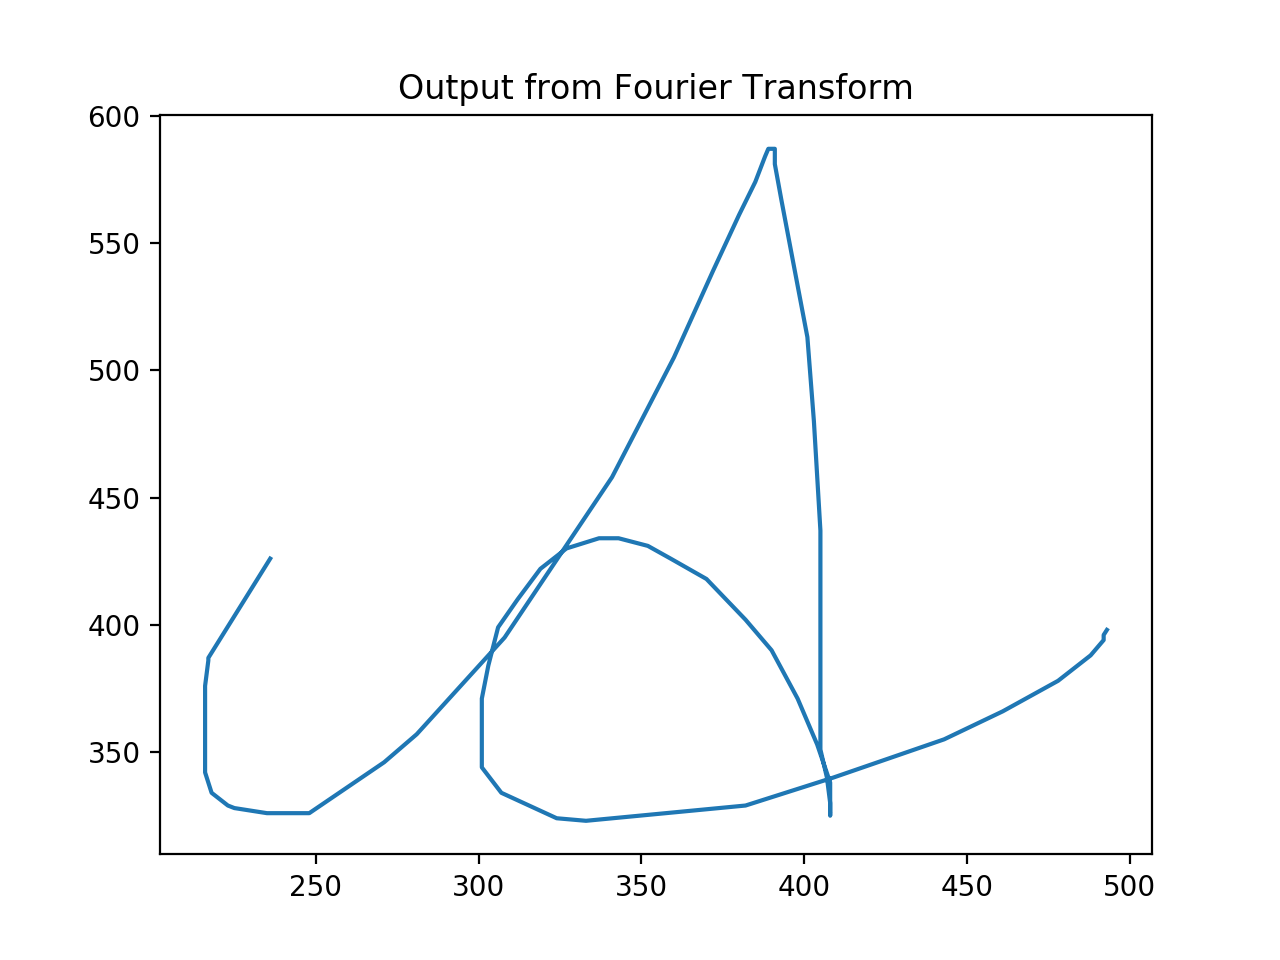

In [5]:
fig = plt.figure("Output of 3D Sinusoidal Signal Generated")
plt.title("Output from Fourier Transform")
plt.plot(real, imag)
plt.show()

<IPython.core.display.Javascript object>


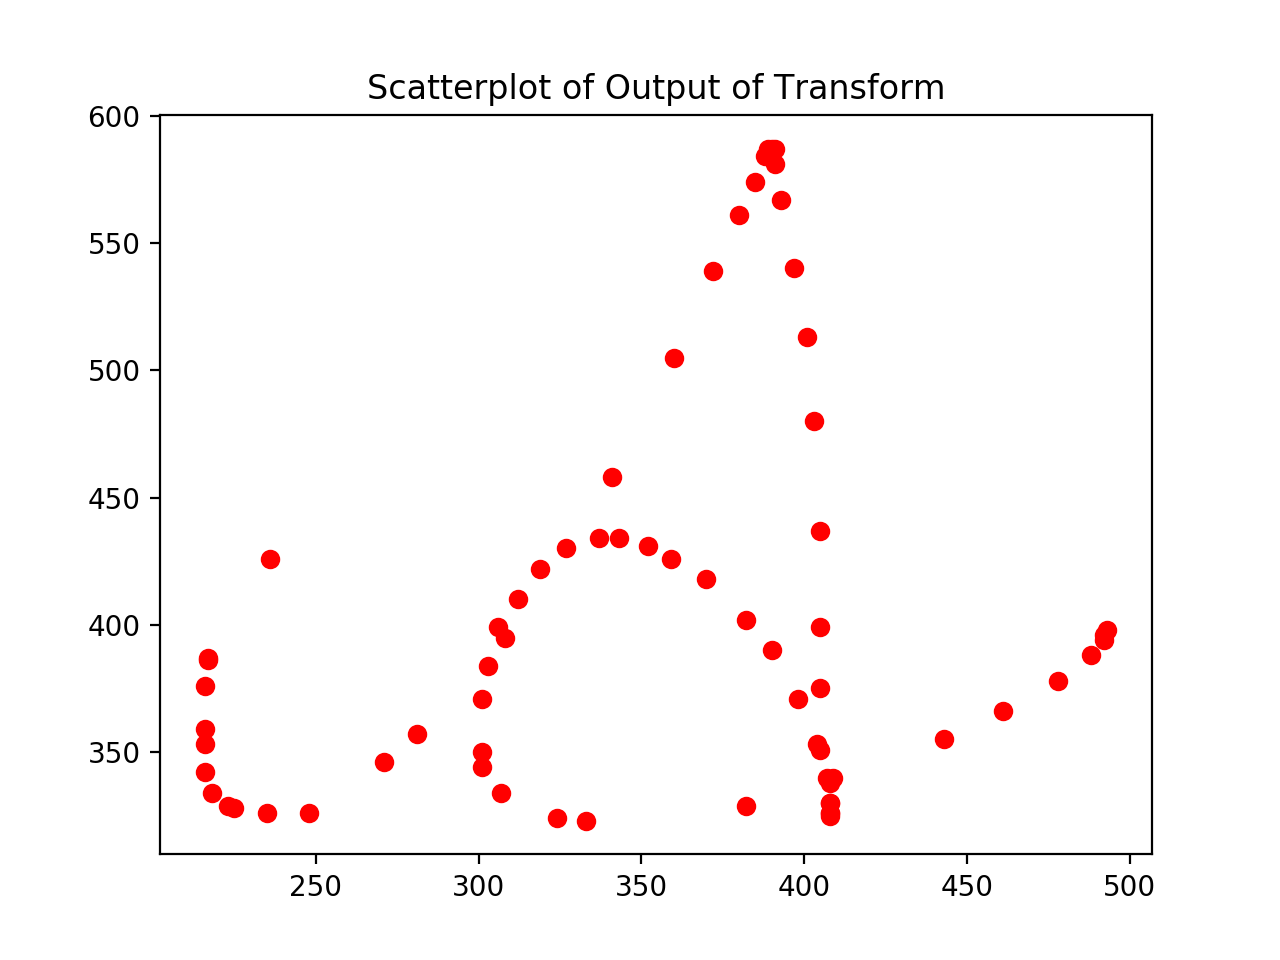

In [6]:
fig = plt.figure("Generated Points")
plt.scatter(real, imag, color='red')
# plt.scatter(np.real(sampledPoints), np.imag(sampledPoints))
plt.title("Scatterplot of Output of Transform")
plt.show()

<IPython.core.display.Javascript object>


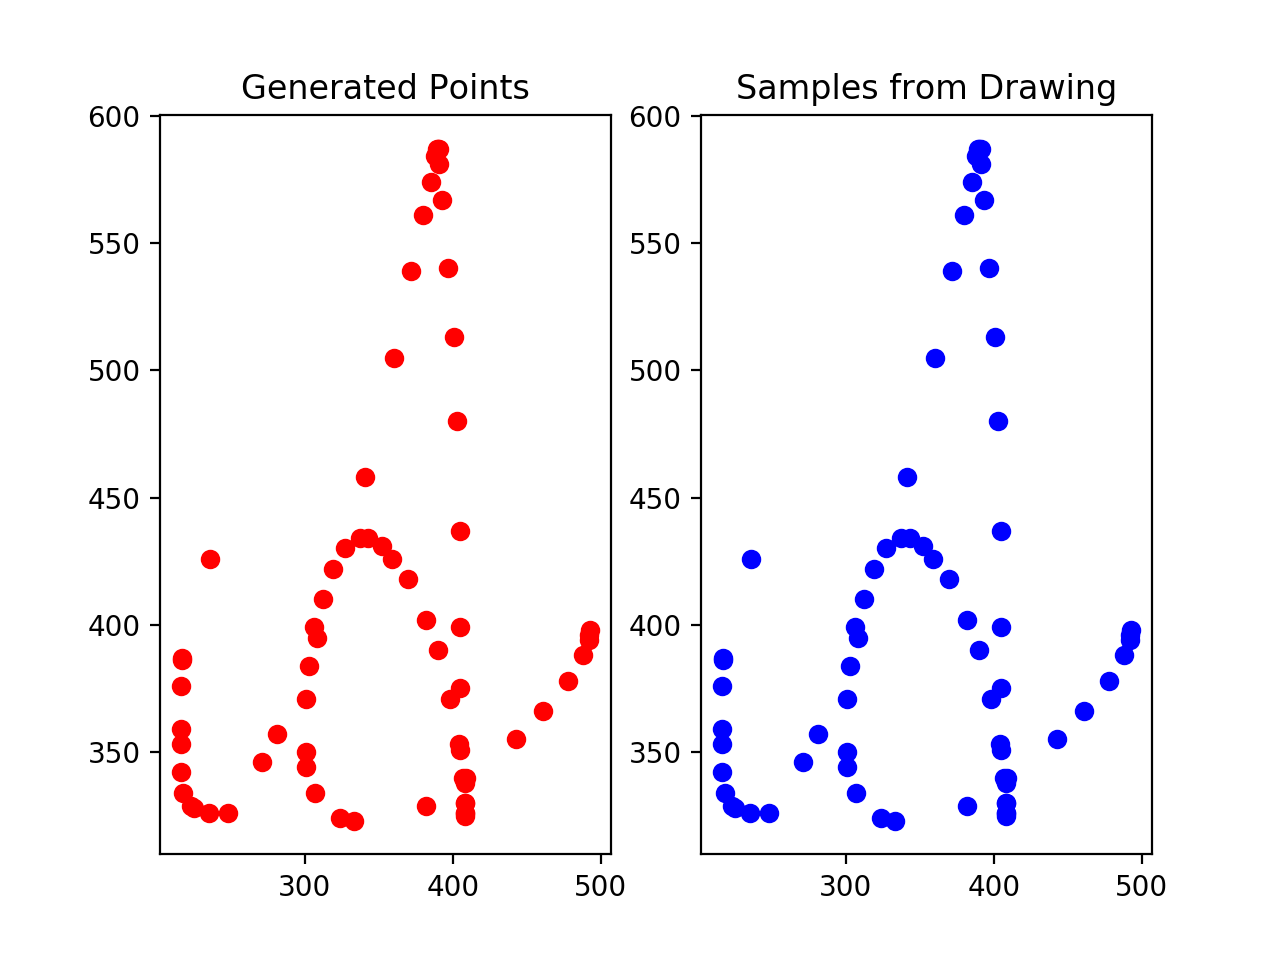

In [7]:
fig = plt.figure("Comparison of Generated Signal vs Original Drawing")

plt.subplot(121)
plt.scatter(real, imag, color='red')
plt.title("Generated Points")

plt.subplot(122)
plt.scatter(np.real(sampledPoints), np.imag(sampledPoints), color='blue')
plt.title("Samples from Drawing")

plt.show()

In [8]:
# animation & drawing
abs_fft = np.absolute(points_fft)/N
phase_fft = np.angle(points_fft)

# useful values
n_circles = len(points_fft)
flag = 0

circles = df.get_initVals(n_circles, abs_fft, phase_fft)



<IPython.core.display.Javascript object>


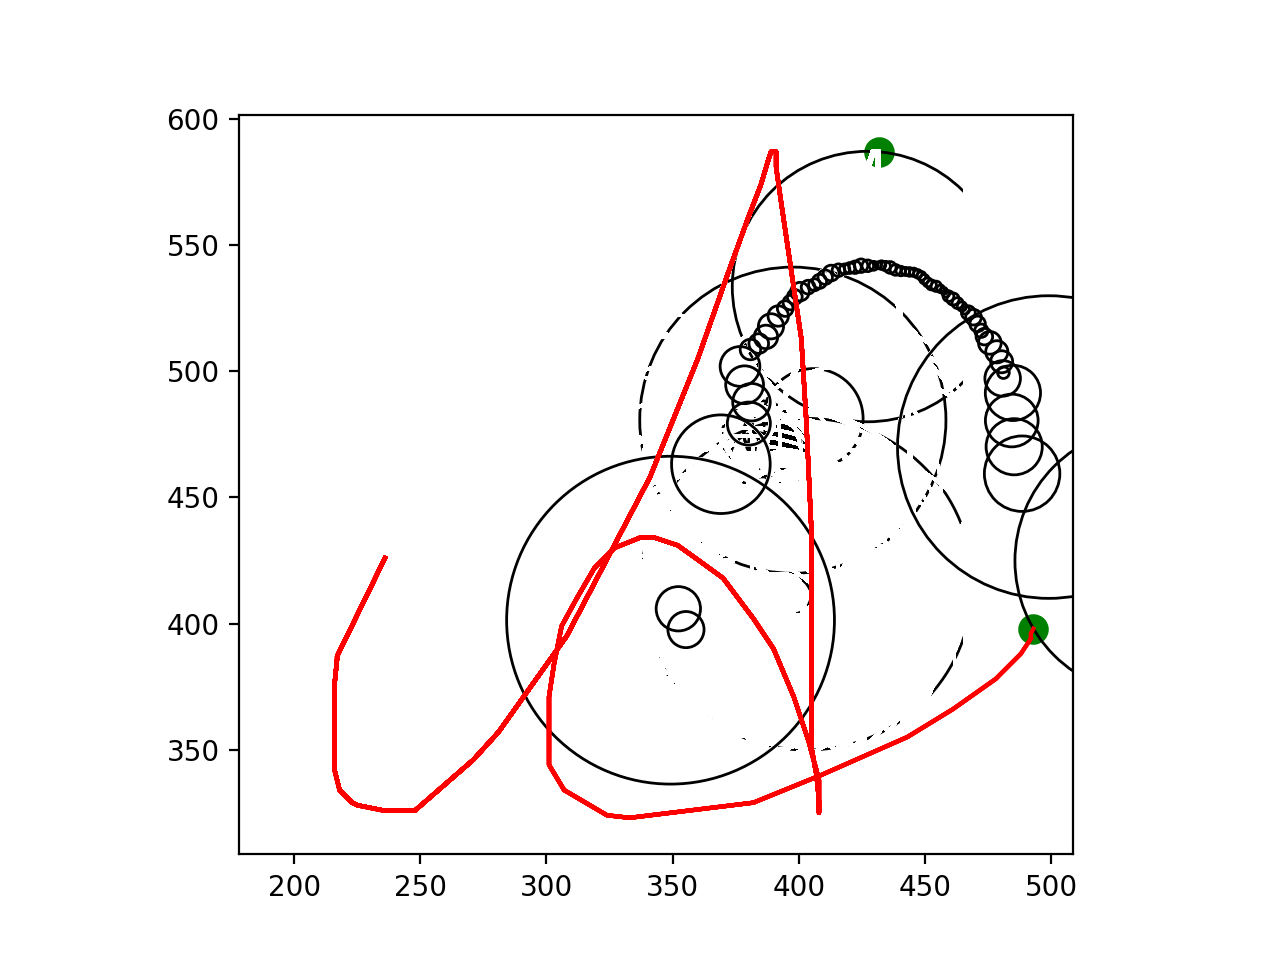

In [9]:
# Epicycle Drawing Animation

fig = plt.figure("Epicyclic Drawing of Generated Function")
ax = plt.axes()
    
def init():
    
    initCirclesPos = df.pos_at(0, abs_fft, phase_fft)
   
    for i in range(n_circles):
        if i:
            circles[i].center = initCirclesPos[i]
            ax.add_patch(circles[i])
    
    global sc 
    sc = ax.scatter(real[0], imag[0], lw=5, color='g')
        
    return [circles]

def animate(i):
 
    newCirclesPos = df.pos_at(i, abs_fft, phase_fft)
    for m in range(n_circles):
        if m:
            circles[m].center = newCirclesPos[m]
    
    ax.plot(real[:i+1], imag[:i+1], color='r')
    ax.axis("scaled") 
    
    global sc
    sc.remove()
    sc = ax.scatter(real[i], imag[i], lw=5, color='g')
    
    #shows frame number
    plt.title("t = "+str(i))
    
    return [circles]

anim=FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=False, repeat=False)
plt.show()
        
        

In [10]:

#override
# saveAnimation = 1

if saveAnimation:
    import matplotlib.animation as animation
    
    Writer = animation.writers['ffmpeg']
    writer = Writer(metadata=dict(artist='Ahish'), bitrate=1800)
    anim.save("current.mp4", writer=writer)

<IPython.core.display.Javascript object>


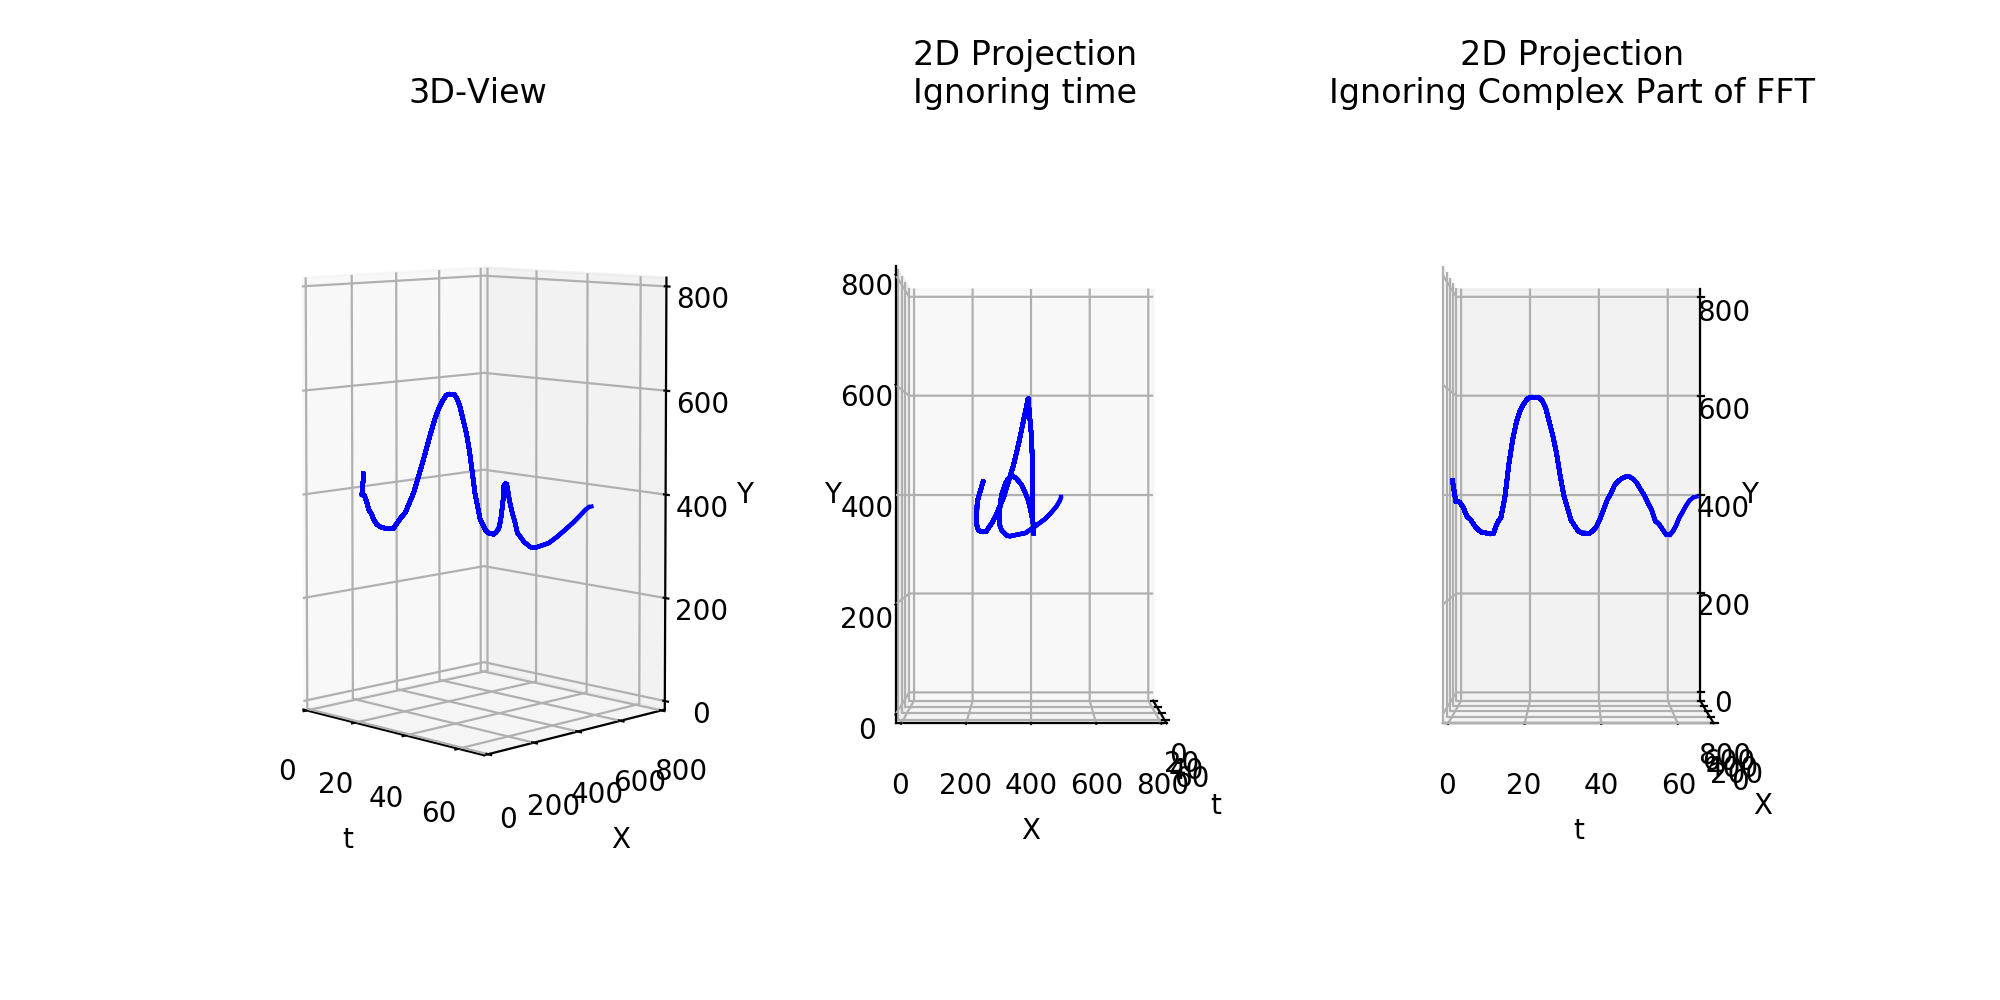

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig3D = plt.figure("3D Plot", figsize=(10,5))
ax1 = fig3D.add_subplot(131, projection='3d')
ax2 = fig3D.add_subplot(132, projection='3d')
ax3 = fig3D.add_subplot(133, projection='3d')

plt.xlim(600)  
plt.ylim(600)

#first subplot
ax1.view_init(5,-45)
ax1.set_xlabel('t')
ax1.set_ylim3d([0.0, 800])
ax1.set_ylabel('X')
ax1.set_zlim3d([0.0, 800])
ax1.set_zlabel('Y')
ax1.invert_xaxis()
ax1.title.set_text("3D-View")

#second subplot
ax2.view_init(0, 0)
ax2.set_xlabel('t')
ax2.set_ylim3d([0.0, 800])
ax2.set_ylabel('X')
ax2.set_zlim3d([0.0, 800])
ax2.set_zlabel('Y')
ax2.invert_xaxis()
ax2.title.set_text("2D Projection\nIgnoring time")

#third subplot
ax3.view_init(0,-90)
ax3.set_xlabel('t')
ax3.set_ylim3d([0.0, 800])
ax3.set_ylabel('X')
ax3.set_zlim3d([0.0, 800])
ax3.set_zlabel('Y')
ax3.invert_xaxis()
ax3.title.set_text("2D Projection\nIgnoring Complex Part of FFT")

    
def init2():  
    return

def animate2(i):
    
    ax1.plot(range(i), real[:i], imag[:i], color='b')
    ax1.set_xlim3d([0.0, i])
    
    ax2.plot(range(i), real[:i], imag[:i], color='b')
    ax2.set_xlim3d([0.0, i])
    
    ax3.plot(range(i), real[:i], imag[:i], color='b')
    ax3.set_xlim3d([0.0, i])
    
    return 
    

anim3D=FuncAnimation(fig3D, animate2, init_func=init2, frames=N, interval=20, blit=False, repeat=False)
plt.show()

In [12]:
#override
saveAnimation = 1

if saveAnimation:
    import matplotlib.animation as animation
    
    Writer = animation.writers['ffmpeg']
    writer = Writer(metadata=dict(artist='Ahish'), bitrate=1800)
    anim3D.save("current-3D.mp4", writer=writer)